# Heart Disease Classification usign Decision Tree
By 23AIML056_Kavya

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [2]:
df_og = pd.read_csv("datasets/heart_disease_uci.csv")
df_og.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df_og.shape

(920, 16)

Our data has 16 features each containing 920 rows

In [4]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df_og.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Our data has a lot of null values

In [6]:
numerical_columns = df_og.select_dtypes(include=["int64","float64"]).columns
categorical_columns = df_og.select_dtypes(include=["object"]).columns

print(f"Numerical Columns: {numerical_columns}\nCategorical Columns: {categorical_columns}")

Numerical Columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')
Categorical Columns: Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


in numerical columns we will impude with median and in categorical columns we will impude with mode

In [7]:
df = df_og.copy(deep=True)

In [8]:
for col in numerical_columns:
    median = df[col].median()
    df[col] = df[col].fillna(median)

for col in categorical_columns:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

df.isna().sum()

C:\Users\Kavya\AppData\Local\Temp\ipykernel_30120\3246605205.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode)


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

- now our data is completely not null
- but in our target column num, we will replace every value that is greater than 1 with 1.

In [9]:
df["num"] = df["num"].clip(upper=1)

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## EDA

### Numerical Features

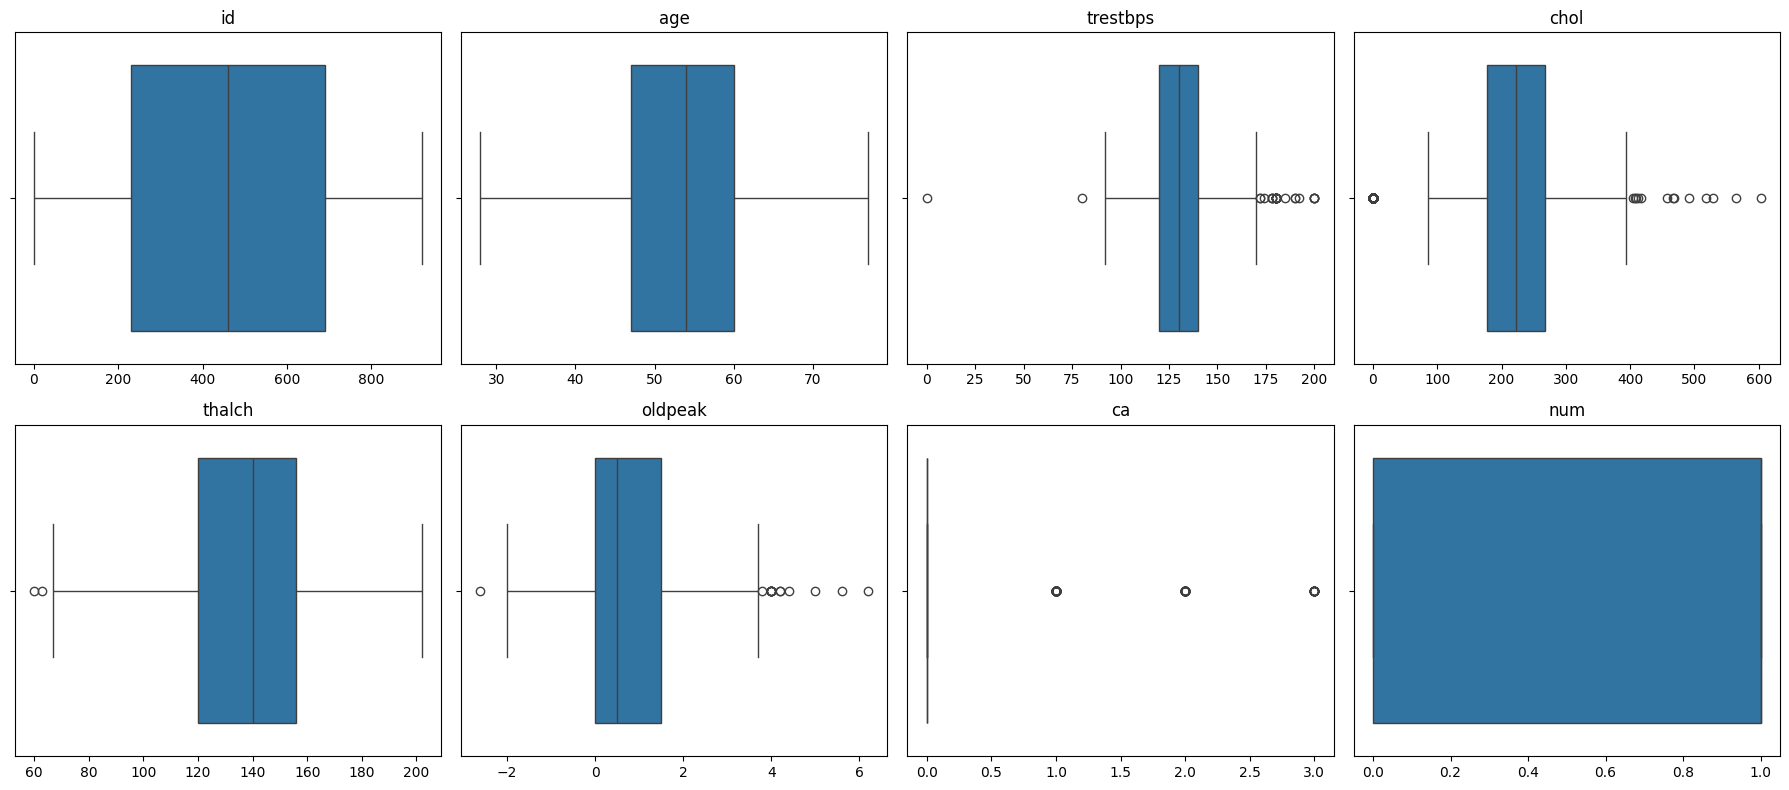

In [10]:
num_features = len(numerical_columns)
cols = 4
rows = math.ceil(num_features / cols)

plt.figure(figsize=(18, 4 * rows))

for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.xlabel("")

for idx in range(num_features + 1, rows * cols + 1):
    plt.subplot(rows, cols, idx)
    plt.axis("off")

plt.tight_layout()
plt.show()

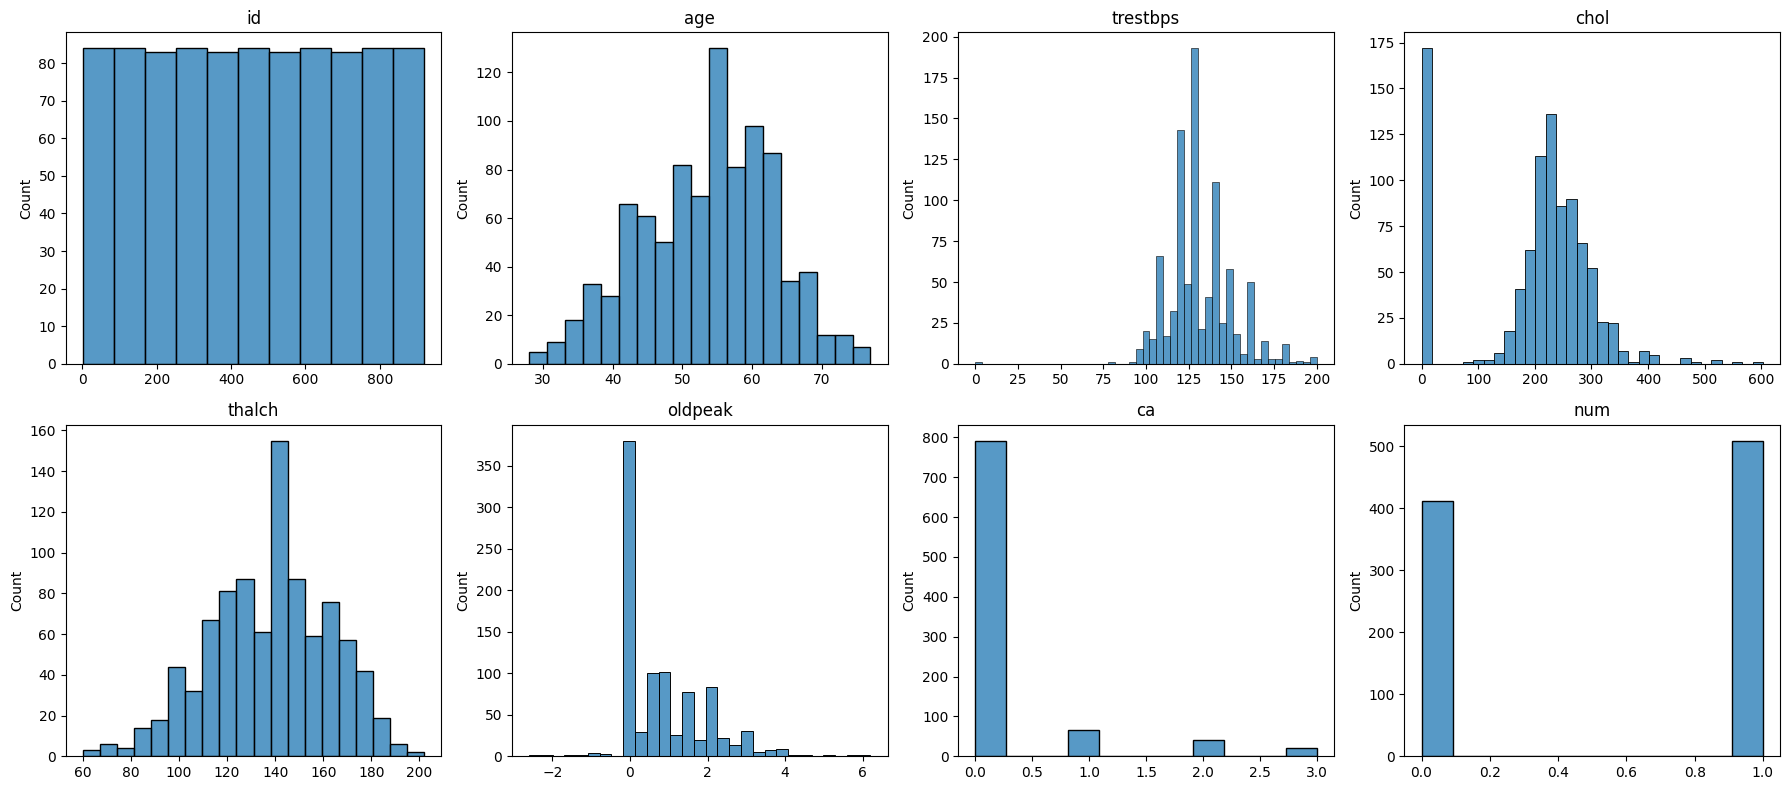

In [11]:
num_features = len(numerical_columns)
cols = 4
rows = math.ceil(num_features / cols)

plt.figure(figsize=(18, 4 * rows))

for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, idx)
    sns.histplot(x=df[col])
    plt.title(col)
    plt.xlabel("")

for idx in range(num_features + 1, rows * cols + 1):
    plt.subplot(rows, cols, idx)
    plt.axis("off")

plt.tight_layout()
plt.show()

### Categorical features

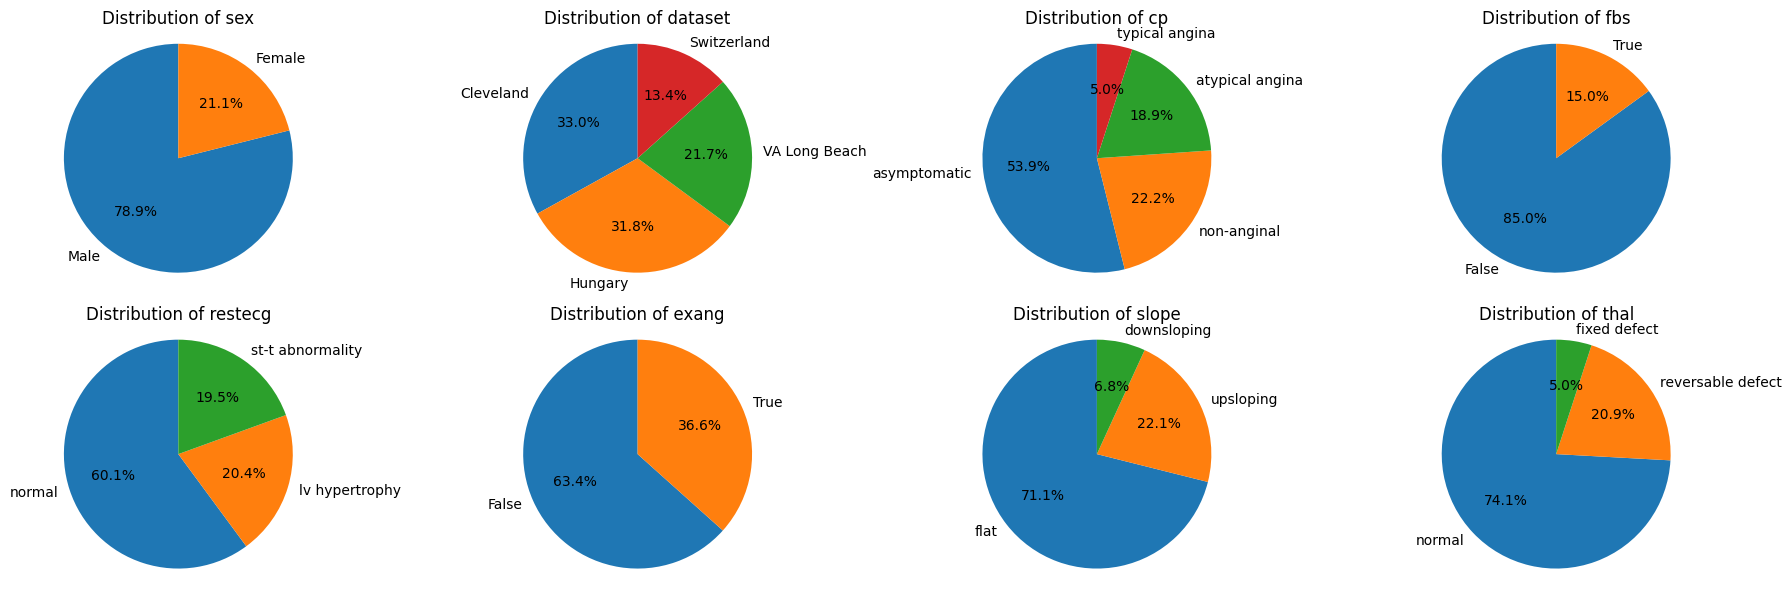

In [12]:
num_features = len(categorical_columns)
cols = 4
rows = math.ceil(num_features / cols)

plt.figure(figsize=(18, 3 * rows))

for idx, col in enumerate(categorical_columns, 1):
    plt.subplot(rows, cols, idx)

    counts = df[col].value_counts()
    plt.pie(counts.values, labels=counts.index, autopct="%1.1f%%", startangle=90)

    plt.title(f"Distribution of {col}")
    plt.axis("equal")

# turn off empty subplots
for idx in range(num_features + 1, rows * cols + 1):
    plt.subplot(rows, cols, idx)
    plt.axis("off")

plt.tight_layout()
plt.show()

### target variable

In [13]:
df["num"].value_counts()

num
1    509
0    411
Name: count, dtype: int64

### Conclusion:
- Some of our columns have outliers that we will have to handle
- Our data is not normally distributed but we can fix that using standard scaling after data splitting
- Our data has mostly male patients with 78.9%
- Our data has the most entry from cleaveland with 33%
- More than half of the people has asymptotic chest pain
- 85% of the people doesnt have Fasting blood sugar
- 60% people have normal Resting Electrocardiographic Results
- 63.4% people dont have Exercise-Induced Angina.
- 71% people have flat slope of ST.
- 74% people have normal results on thallium stress test.
- Our target variable is fairly balanced.

## Data Preprocessing

Now let's handle outliers

In [14]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

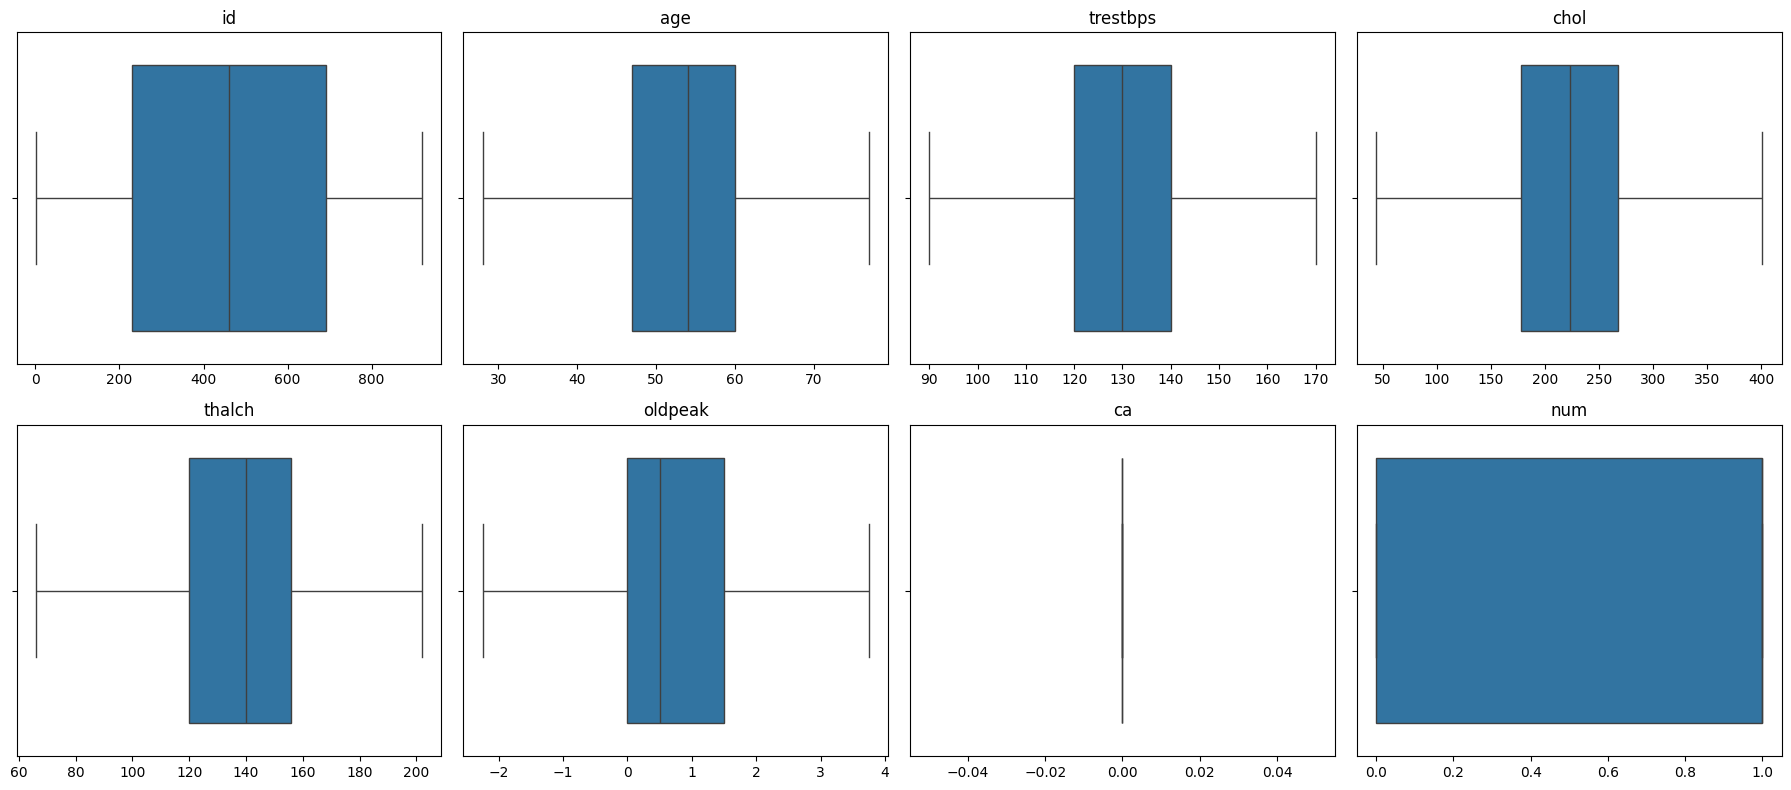

In [15]:
num_features = len(numerical_columns)
cols = 4
rows = math.ceil(num_features / cols)

plt.figure(figsize=(18, 4 * rows))

for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.xlabel("")

for idx in range(num_features + 1, rows * cols + 1):
    plt.subplot(rows, cols, idx)
    plt.axis("off")

plt.tight_layout()
plt.show()

convert categorical features to numerical features using label encoder

In [16]:
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()    

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,0.0,1,1
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,0.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


## Feature selection

<Axes: >

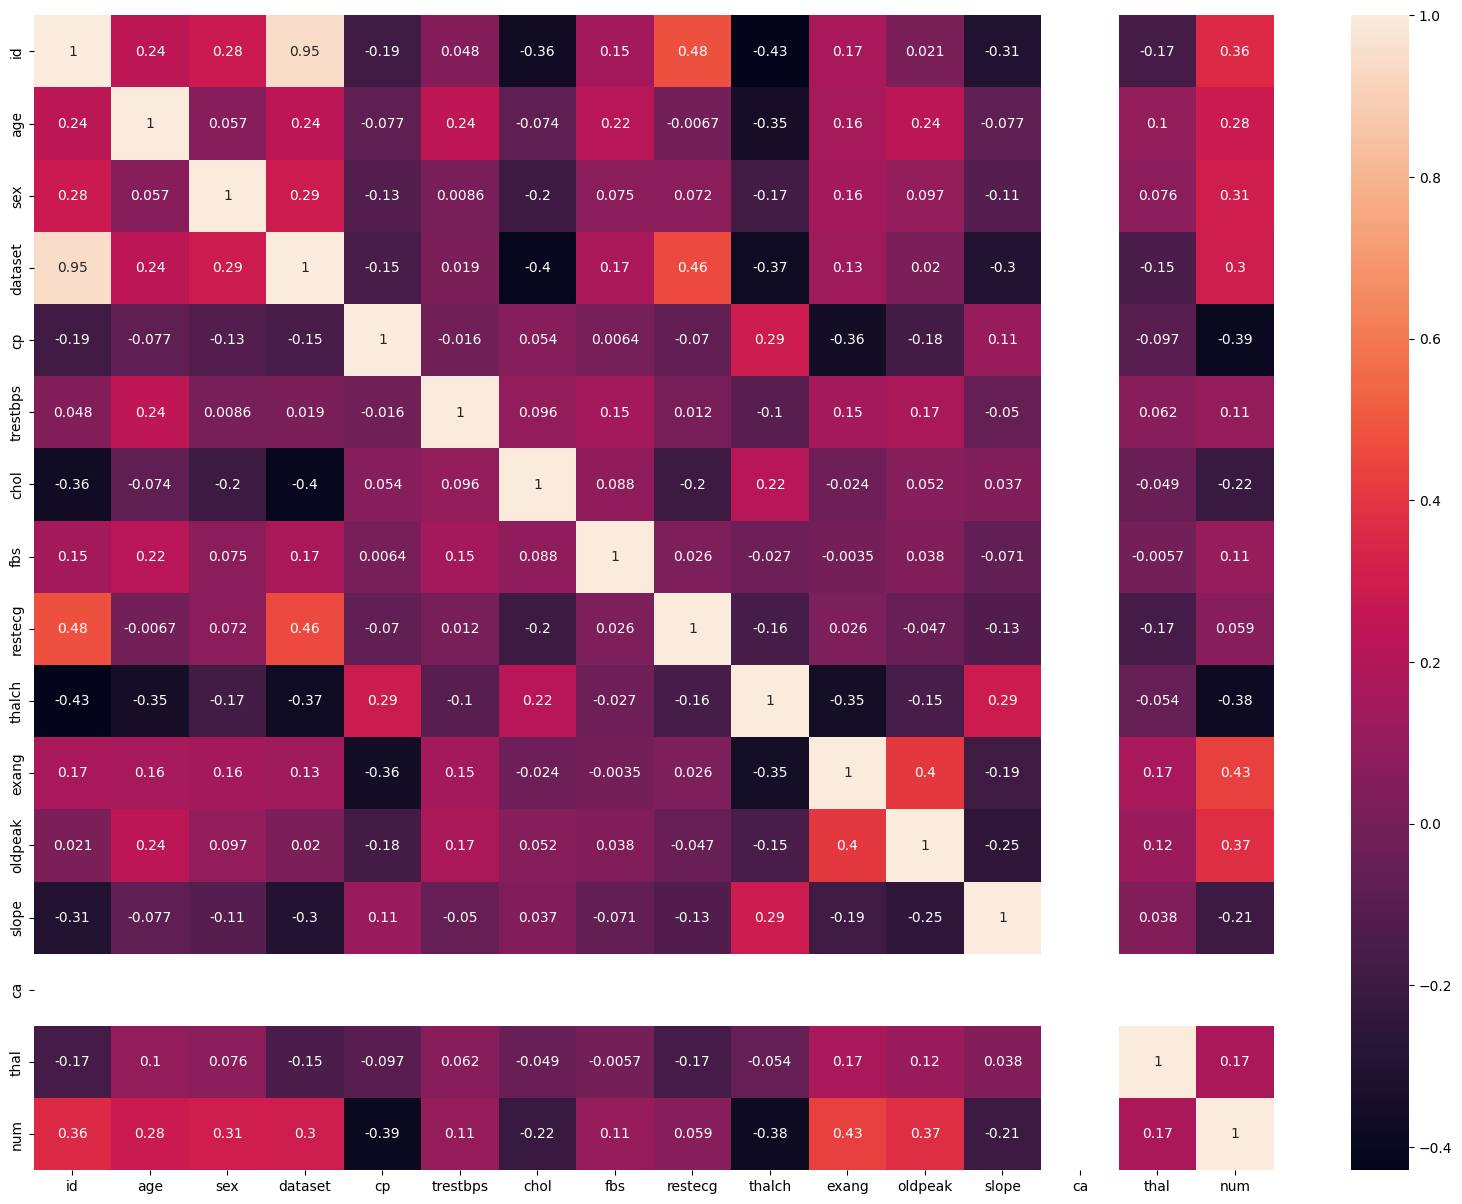

In [17]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True)

In [18]:
col_to_drop = ["id", "ca", "thal"]
df = df.drop(columns=col_to_drop, axis=1)
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,1
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,1
3,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0


## Splitting the data

In [19]:
X = df.drop("num", axis = 1)
y = df["num"]

print(f"X Shape: {X.shape}\ny Shape: {y.shape}")

X Shape: (920, 12)
y Shape: (920,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(
    f"X_train Shape; {X_train.shape}\ny_train Shape: {y_train.shape}\nX_test Shape: {X_test.shape}\ny_test Shape: {y_test.shape}"
)

X_train Shape; (690, 12)
y_train Shape: (690,)
X_test Shape: (230, 12)
y_test Shape: (230,)


In [21]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

print(
    f"X_train_sc Shape; {X_train_sc.shape}\nX_test_sc Shape: {X_test_sc.shape}"
)

X_train_sc Shape; (690, 12)
X_test_sc Shape: (230, 12)


## Model Training

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train_sc, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [23]:
y_pred_train_data = dt.predict(X_train_sc)
print(f"y_pred_train_data Shape: {y_pred_train_data.shape}")

y_pred_test_data = dt.predict(X_test_sc)
print(f"y_pred_test_data Shape: {y_pred_test_data.shape}")

y_pred_train_data Shape: (690,)
y_pred_test_data Shape: (230,)


In [24]:
print(classification_report(y_train, y_pred_train_data))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       315
           1       1.00      1.00      1.00       375

    accuracy                           1.00       690
   macro avg       1.00      1.00      1.00       690
weighted avg       1.00      1.00      1.00       690



In [25]:
print(classification_report(y_test, y_pred_test_data))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71        96
           1       0.81      0.72      0.76       134

    accuracy                           0.73       230
   macro avg       0.73      0.74      0.73       230
weighted avg       0.74      0.73      0.74       230



The Decision Tree classifier achieved perfect performance on the training set (accuracy = 1.00), but significantly lower performance on the test set (accuracy = 0.73). This large gap indicates that the model has overfitted the training data and does not generalize well to unseen samples. Overfitting occurs because the tree was allowed to grow too deep, capturing noise and specific patterns in the training data.

## Hyperparamter tuning

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "criterion": ["gini", "entropy"],
    "max_features": [None, "sqrt", "log2"],
}

In [28]:
dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

grid_search.fit(X_train_sc, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for ea

In [29]:
print("Best Parameters:")
print(grid_search.best_params_)

print("\nBest Cross-Validation Accuracy:")
print(grid_search.best_score_)

Best Parameters:
{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}

Best Cross-Validation Accuracy:
0.8


In [30]:
best_dt = grid_search.best_estimator_

y_pred_test = best_dt.predict(X_test_sc)

In [31]:
print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        96
           1       0.87      0.77      0.81       134

    accuracy                           0.80       230
   macro avg       0.79      0.80      0.79       230
weighted avg       0.81      0.80      0.80       230

Confusion Matrix:
[[ 80  16]
 [ 31 103]]


After hyperparameter tuning, the Decision Tree classifier showed improved generalization performance. Test accuracy increased from approximately 73% to 80%, and the gap between training and test performance was reduced. This indicates that overfitting was successfully mitigated by controlling model complexity through hyperparameters such as maximum depth and minimum samples per leaf.

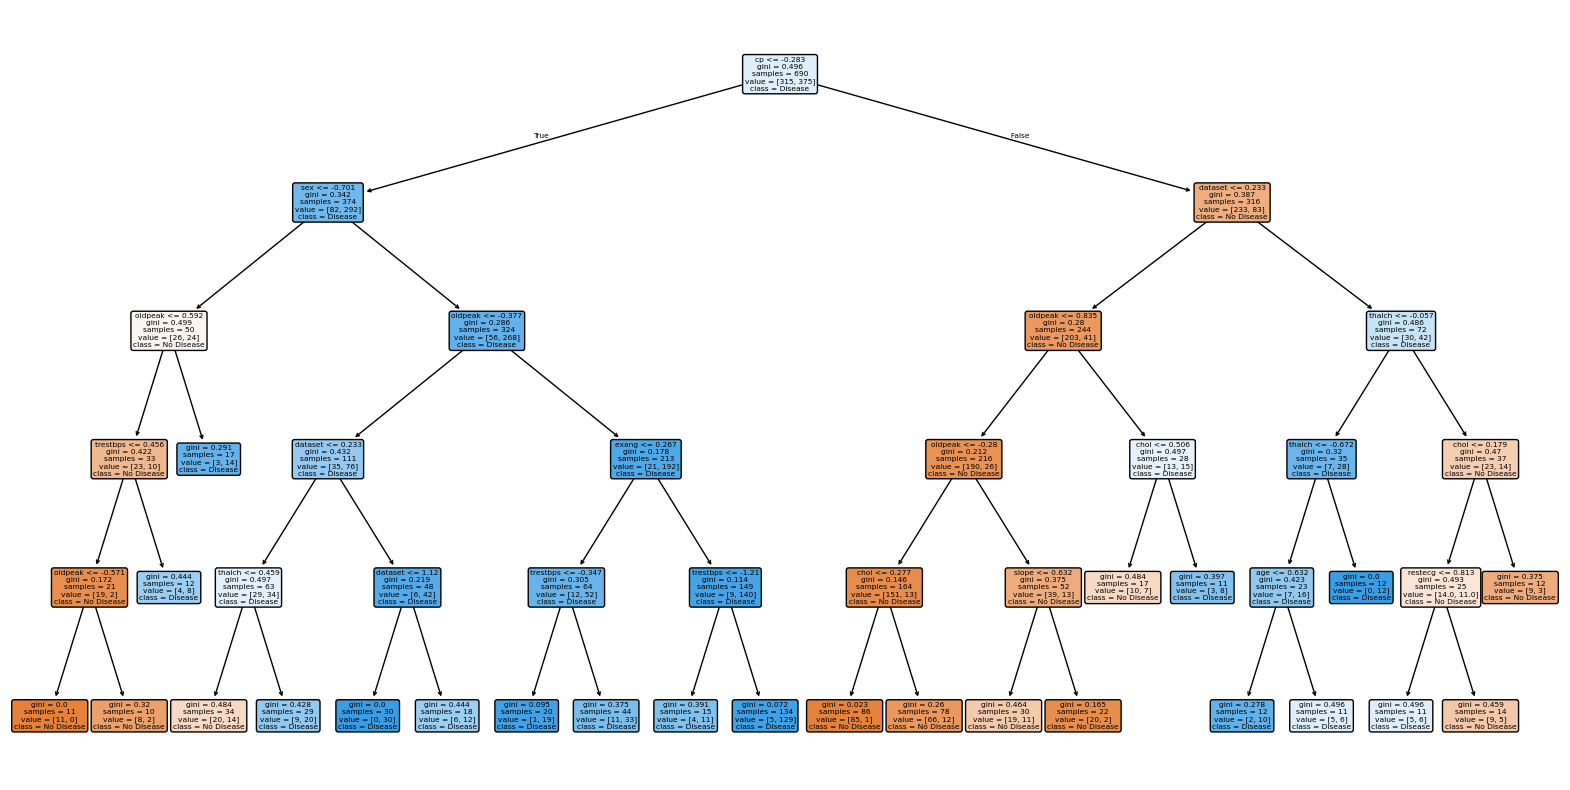

In [32]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
)
plt.show()